# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/12NDTSyib6CBh4IAqXsstvxlrThPJS5sr#scrollTo=2TrsqdNgS5ex

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [ ]:
import pandas as pd
raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data.values.shape

(150, 5)

In [ ]:
import numpy as np
raw_data = raw_data.values

X_train = raw_data[:,:4]
y_train = raw_data[:,4:5].astype(int)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form
from scipy.special import softmax

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  output = softmax(np.dot(layer1, w1), axis=1)
 
  #Back propagation using gradient descent

  #cross-entropy loss
  error = np.sum(-np.multiply(y_train,np.log(output)))/len(X_train)

  #initialize gradients to zero 
  dw0, dw1 = [0,0]

  #calculate partial derivatives
  # TO BE COMPLETED

  #determine gradients
  dw1 += (np.transpose(layer1))@(output-y_train)

  step1=output-y_train
  step2=np.transpose(w1)
  step3=np.matmul(step1,step2)
  step4=np.multiply(layer1,(1-layer1))
  step5=np.multiply(step3,step4)
  step6=np.transpose(X_train)
  step7=np.matmul(step6,step5)
  dw0 += step7
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))/len(X_train)

  return (error, dW, output)

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

ann(W,X_train, y_train)

(1.1704441418542955,
 array([ 1.24643892e-01,  7.38442410e-04,  1.29588107e-01,  8.08780544e-02,
         3.21554400e-02,  9.74923468e-02,  5.22552664e-04,  6.52562983e-02,
         4.25742993e-02, -6.55054807e-04,  1.24184172e-02,  1.70192528e-04,
         1.14687989e-01,  6.20744088e-02,  6.03111091e-02, -3.61240245e-03,
         1.44459448e-05,  4.86316561e-02,  2.44363260e-02,  2.42747539e-02,
        -2.02360455e-02,  1.21330152e-02,  8.10303026e-03, -6.88080962e-04,
         3.82583386e-04,  3.05497577e-04,  6.77734316e-02,  3.48390374e-02,
        -1.02612469e-01, -2.55954658e-02,  6.53874847e-02, -3.97920188e-02,
         1.29754650e-03,  3.97604028e-03, -5.27358679e-03]),
 array([[0.29347521, 0.42321087, 0.28331392],
        [0.2894042 , 0.4300288 , 0.28056701],
        [0.28949704, 0.43215451, 0.27834845],
        [0.29101648, 0.43471152, 0.274272  ],
        [0.29397859, 0.42424033, 0.28178108],
        [0.29893372, 0.41823503, 0.28283125],
        [0.29179213, 0.43332799, 0

### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001 #if we decrease this step size, we could get a lower error
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [ ]:
#examine predictions on training data
np.round(y_pred, 1)

array([[0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1, 0. ],
       [0.9, 0.1

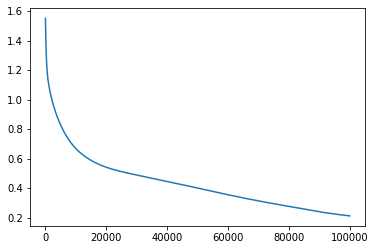

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(errors)), np.array(errors))

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] + 0.00001
  We2[ind] = We2[ind]
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.00001
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 0.06633198563754661 0.06632735252905961
0.0 0.0005452152951335165 0.0005452027101587537
0.0 -0.037002219310799944 -0.03700141948568454
0.0 -0.0008138246077038501 -0.0008138026800226498
0.0 -0.024193007486239534 -0.02419307455276116
0.0 0.052513422232891564 0.05251206672832611
0.0 0.00039562131348702673 0.00039561461186926844
0.0 -0.024294225386967124 -0.024293878208402085
0.0 -0.00039785237326839246 -0.00039784707110414915
0.0 -0.03084569821787397 -0.030845282173229804
0.0 -0.017959858267246886 -0.017962200675746245
0.0 9.54630152705249e-05 9.546392853973581e-05
0.0 -0.012358273937529416 -0.012358183706981312
0.0 -0.0004985329260520643 -0.0004985243603831531
0.0 0.02117964394976468 0.02117886876847743
0.0 -0.021158130958376375 -0.021158430211554557
0.0 -2.6238122785571245e-06 -2.623559536839876e-06
0.0 -0.0021765406588158953 -0.002176541254531188
0.0 -0.00013798717724000653 -0.0001379865671084064
0.0 0.010530210459158695 0.010530124798216123
0.0 0.06904063596380183 0.06904035803677

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [ ]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

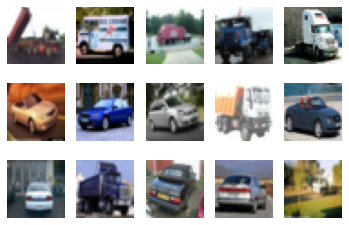

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

8000
2000
2000


**ANSWER:**

We have 8000 training examples, 2000 validation examples and 2000 test examples

### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

**ANSWER:**

We need a validation set when training our model for several reasons, the first is to tune the hyperparameters, where we would see when then validation set is performing well (has a low error) and select the hyperparameters accordingly. The second reason is to see if our model is not overfitting. If we perform very well on the training data, the model could be simply "memorizing" the datapoints we have in the dataset, so we need some validation examples to test if the model is actually learning or not. If we judge the performance of our models using the training set loss/error instead of validation set loss/error we could overfit the data because we would want to minimize the error, which is not necessarily a good thing to have an error of 0 for our training data.

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [ ]:
import sys
small_net_param=0
large_net_param=0
for param1 in small_net.parameters():
  print("small net:", param1.shape)
  small_net_param=small_net_param+(param1.numel())

print(small_net_param)

for param2 in large_net.parameters():
  large_net_param=large_net_param+(param2.numel())
  print("large net:", param2.shape)
print(large_net_param)

small net: torch.Size([5, 3, 3, 3])
small net: torch.Size([5])
small net: torch.Size([1, 245])
small net: torch.Size([1])
386
large net: torch.Size([5, 3, 5, 5])
large net: torch.Size([5])
large net: torch.Size([10, 5, 5, 5])
large net: torch.Size([10])
large net: torch.Size([32, 250])
large net: torch.Size([32])
large net: torch.Size([1, 32])
large net: torch.Size([1])
9705


**ANSWER:**

The total number of parameters in small_net is 386.

The total number of parameters in large_net is 9705.

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

**ANSWER:**

The default value of batch_size is 64.

The default value of learning_rate is 0.01.

The default value of num_epochs is 30.

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [ ]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1: Train err: 0.379125, Train loss: 0.6386087136268616 |Validation err: 0.3415, Validation loss: 0.6232786765322089
Epoch 2: Train err: 0.3005, Train loss: 0.5785431685447693 |Validation err: 0.2895, Validation loss: 0.561301744543016
Epoch 3: Train err: 0.2535, Train loss: 0.5229908549785613 |Validation err: 0.229, Validation loss: 0.49706421606242657
Epoch 4: Train err: 0.230625, Train loss: 0.48705219650268555 |Validation err: 0.214, Validation loss: 0.4741812478750944
Epoch 5: Train err: 0.2065, Train loss: 0.4552995433807373 |Validation err: 0.2035, Validation loss: 0.45081923622637987
Finished Training
Total time elapsed: 18.89 seconds


**ANSWER:**

The files that were written to disk are:

- model_small_bs64_lr0.01_epoch0
- model_small_bs64_lr0.01_epoch1
- model_small_bs64_lr0.01_epoch2
- model_small_bs64_lr0.01_epoch3
- model_small_bs64_lr0.01_epoch4
- model_small_bs64_lr0.01_epoch4_train_err.csv
- model_small_bs64_lr0.01_epoch4_train_loss.csv
- model_small_bs64_lr0.01_epoch4_val_err.csv
- model_small_bs64_lr0.01_epoch4_val_loss.csv

The first 5 store information about the model with the parameters we set at the epoch, it is a checkpoint and if we want, we can load all the information regarding each epoch in later stages in the code (which we do in part 4:a), the last 4 files are csv files containing the training error, training loss, validation error and validation loss, which display the results of each of the functions at each epoch.

### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=30)
#The time elapsed is 109.00 seconds.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.19975, Train loss: 0.4391964395046234 |Validation err: 0.211, Validation loss: 0.45279580168426037
Epoch 2: Train err: 0.190875, Train loss: 0.42808135628700256 |Validation err: 0.2125, Validation loss: 0.4628894319757819
Epoch 3: Train err: 0.189875, Train loss: 0.4224487533569336 |Validation err: 0.189, Validation loss: 0.4243196062743664
Epoch 4: Train err: 0.1845, Train loss: 0.41442640805244446 |Validation err: 0.192, Validation loss: 0.42680477909743786
Epoch 5: Train err: 0.181125, Train loss: 0.39818693137168887 |Validation err: 0.178, Validation loss: 0.4230823004618287
Epoch 6: Train err: 0.177125, Train loss: 0.39782354760169986 |Validation err: 0.19, Validation loss: 0.42339622881263494
Epoch 7: Train err: 0.17325, Train loss: 0.38920657730102537 |Validation err: 0.1755, Validation loss: 0.4054659763351083
Epoch 8: Train err: 0.16825, Train loss: 0.3775488746166229 |Validation 

In [ ]:
train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=30)
#The total time elapsed is 125.46 seconds.

#The large_net took longer to train because it had more parameters. Recall in part 2:a, we saw that small_net had 386 parameters, while large_net had
#9705. 

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.509625, Train loss: 0.6933675131797791 |Validation err: 0.5095, Validation loss: 0.6932093091309071
Epoch 2: Train err: 0.502375, Train loss: 0.6932741427421569 |Validation err: 0.5095, Validation loss: 0.6933995503932238
Epoch 3: Train err: 0.508625, Train loss: 0.6932271585464478 |Validation err: 0.5095, Validation loss: 0.6933075692504644
Epoch 4: Train err: 0.490875, Train loss: 0.6931062808036804 |Validation err: 0.4905, Validation loss: 0.6930251251906157
Epoch 5: Train err: 0.504625, Train loss: 0.6934165968894959 |Validation err: 0.5095, Validation loss: 0.6931958235800266
Epoch 6: Train err: 0.495875, Train loss: 0.6931964645385742 |Validation err: 0.4905, Validation loss: 0.6930482722818851
Epoch 7: Train err: 0.501625, Train loss: 0.6932614011764526 |Validation err: 0.5095, Validation loss: 0.6933507956564426
Epoch 8: Train err: 0.495625, Train loss: 0.6932124190330505 |Validati

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

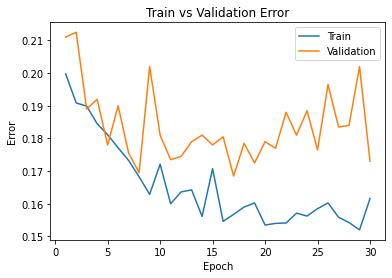

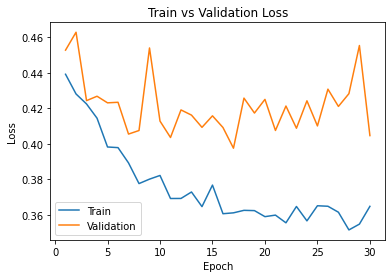

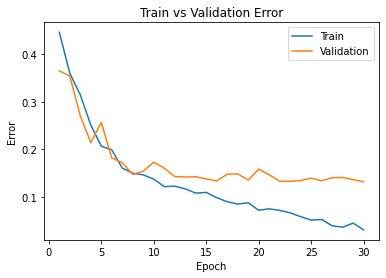

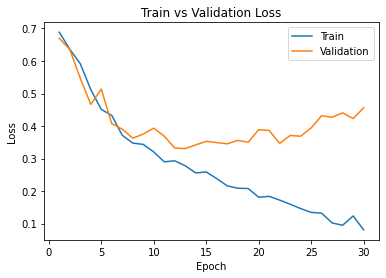

In [ ]:
from sklearn.model_selection import learning_curve
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)


### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

**ANSWER:**

In the small_net, the error and loss curves of both the training and validation sets are spiking up and down on each epoch, which shows that the model is not performing well.

In the large_net, the error and the loss curves of the training set are decreasing with each epoch, while the validation curves keeps decreasing until it starts increasing after a certain epoch (20).

Underfitting is when we are not learning, and thus our model is somewhat "guessing" the labels as if it had not learned. Overfitting is when we try to "memorize" the training data points, and so we perform well in the training curves, but do poorly in the validation.

In this case, we can say that the small_net is overfitting, which could be due to the large learning rate and small batch size for a small set of parameters.

The large net is doing better than the small net, but the loss curve seems to be increasing by the end, which is also indicative of a tendency to be overfitting. But it is definitely performing better than small net by also comparing the values of the errors in both curves, the error for the large_net is way smaller than that of the small_net

## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.6492524642944336 |Validation err: 0.3765, 

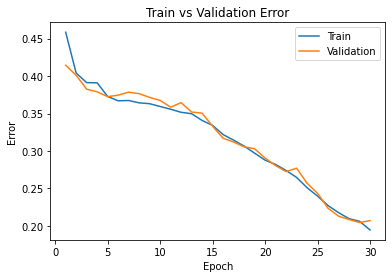

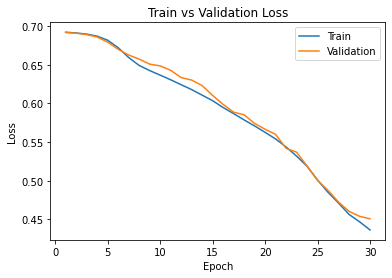

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)
model_path1 = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path1)

**ANSWER:**

The model takes longer to train. Lowering the learning rate increased the error and loss in both the training and the validation and they both have approximately the same values at each epoch, this is underfitting. This behaviour is expected because the number of iterations were not enough to allow the model to converge and predict properly for the training and validation.

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train loss: 0.34258134818077085 |Validation er

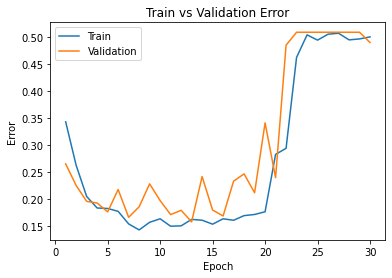

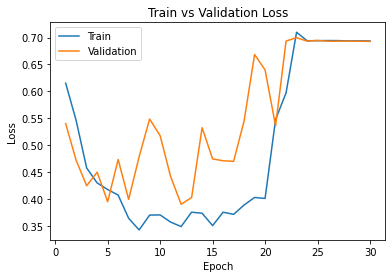

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
model_path2 = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path2)

**ANSWER:**

The model takes less time to train. But the curves are spiking and the loss function increases at the end, which says nothing about how the model is learning, it is unrepresentative. This is because the learning rate is very high, so the model is diverging and not converging, and is giving irregular predictions.

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.6487302668392658 |Validation err: 0.38, Validation

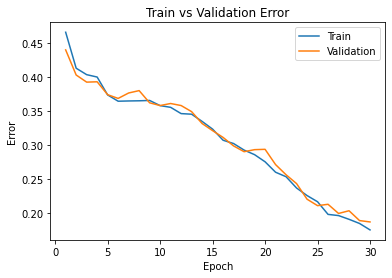

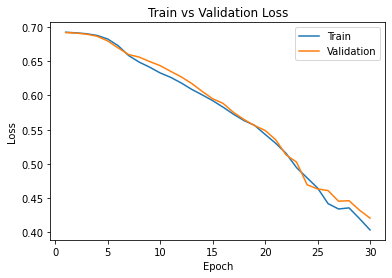

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
model_path3 = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path3)

**ANSWER:**

The model takes less time to train. But the curves show that there is underfitting, which is expected because the quality of the model degrades when we increase the batch size too much, and thus leads to poor generalization.

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train lo

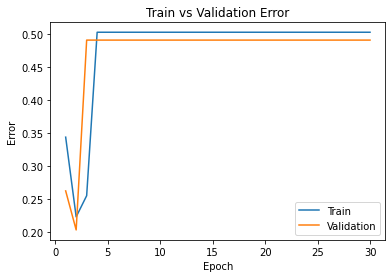

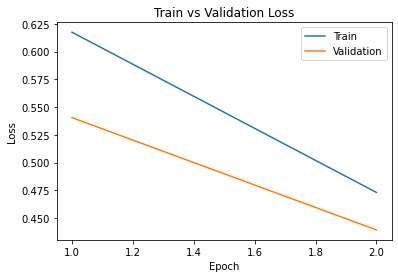

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
model_path4 = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path4)

**ANSWER:**

Decreasing the batch size made the model take more time to train, and the loss gives nan, which can be explained by the fact that if we had outliers in a small batch size, they would affect the gradient more drastically than if we had a larger batch size. This being said, it will not allow us to converge, it will diverge.

## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

**ANSWER:**

We could decrease the number of batches as a first step to 32 (2^5), but not too much for outliers to become noisy and see how the model performs, and we would need to decrease the learning rate to 0.001 at the same time to make sure that the model will converge, and thus improves the validation accuracy.

### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43575, Train loss: 0.6917999017238617 |Validation err: 0.4005, Validation loss: 0.6908418952472626
Epoch 2: Train err: 0.391125, Train loss: 0.6885279052257538 |Validation err: 0.3825, Validation loss: 0.6861630422728402
Epoch 3: Train err: 0.369625, Train loss: 0.6772016158103943 |Validation err: 0.3715, Validation loss: 0.6702478244191125
Epoch 4: Train err: 0.364375, Train loss: 0.6550927977561951 |Validation err: 0.377, Validation loss: 0.6561524016516549
Epoch 5: Train err: 0.3655, Train loss: 0.640807126045227 |Validation err: 0.3675, Validation loss: 0.6468247288749331
Epoch 6: Train err: 0.353375, Train loss: 0.6287272845506668 |Validation err: 0.366, Validation loss: 0.6345798534060282
Epoch 7: Train err: 0.347625, Train loss: 0.6155831761360169 |Validation err: 0.352, Validation loss: 0.6205919034897335
Epoch 8: Train err: 0.33025, Train loss: 0.6000627863407135 |Validation err: 

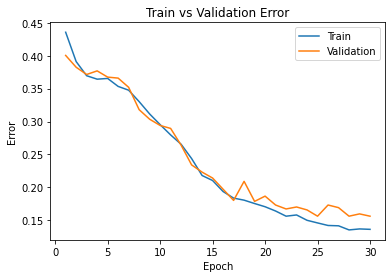

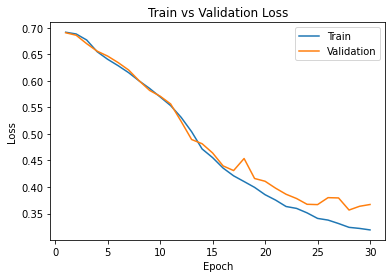

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=32, learning_rate=0.001)
model_path5 = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path5)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

**ANSWER:**

Based on part a, we started with a small batch size, but increasing the size is usually better because it prevents the "tug of war" between the different batches.

As we saw, increasing the batch size decreases the time it takes for the model to train while sacrificing a bit on the quality of the model, but having a batch size of 512 was too large. I would predict that having a batch size of 128 (2^7) would help improve the validation accuracy, while keeping the learning rate at 0.01.

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.422375, Train loss: 0.6906225756993369 |Validation err: 0.379, Validation loss: 0.6866835914552212
Epoch 2: Train err: 0.3725, Train loss: 0.6666498363964142 |Validation err: 0.3845, Validation loss: 0.6588953025639057
Epoch 3: Train err: 0.359875, Train loss: 0.6334257116393437 |Validation err: 0.3605, Validation loss: 0.6272586286067963
Epoch 4: Train err: 0.330375, Train loss: 0.60195872802583 |Validation err: 0.3095, Validation loss: 0.5926155969500542
Epoch 5: Train err: 0.30075, Train loss: 0.5731945018919687 |Validation err: 0.2955, Validation loss: 0.5629587732255459
Epoch 6: Train err: 0.260375, Train loss: 0.5290653454878974 |Validation err: 0.2405, Validation loss: 0.5019676946103573
Epoch 7: Train err: 0.21325, Train loss: 0.4625437032608759 |Validation err: 0.2015, Validation loss: 0.44533182866871357
Epoch 8: Train err: 0.200125, Train loss: 0.4396321238979461 |Validation err

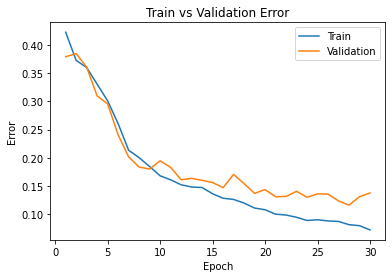

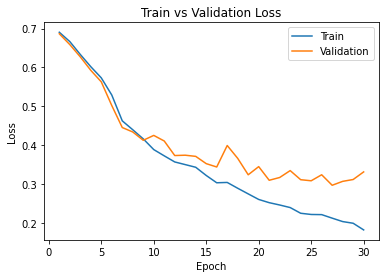

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=128, learning_rate=0.01)
model_path6 = get_model_name("large", batch_size=128, learning_rate=0.01, epoch=29)
plot_training_curve(model_path6)

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
net = LargeNet()
model_path7 = get_model_name(net.name, batch_size=128, learning_rate=0.01, epoch=28)
state = torch.load(model_path7)
net.load_state_dict(state)

<All keys matched successfully>

### Part (b) - 2pt

Justify your choice of model from part (a).

**ANSWER:**

When the parameters were: batch_size=128, learning_rate=0.01, the model was performing well, the validation error is low, but it seems that the loss is increasing at the end, and is indicative of slightly overfitting.

When the parameters were: batch_size=32, learning_rate=0.001, the model was also performing well, but the error is higher than the previously mentioned model at every epoch.

For this reason, I decided to take the batch_size=128 and learning_rate=0.01, as the validation errors and loss are low. I chose the epoch number to be 28 because it was the epoch at which the validation error was minimized (0.116).

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=128)

evaluate(net, test_loader, nn.BCEWithLogitsLoss())

Files already downloaded and verified
Files already downloaded and verified


(0.129, 0.32209498435258865)

### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

**ANSWER:**

Validation error,loss=(0.116, 0.307) while test error,loss=(0.129, 0.322).
The test classification error is higher than that of the validation error, which is expectable because the validation data is the data from which we tuned the hyperparameters in a way that minimizes the error on the validation datapoints, so when we are testing the model on our test data, which is data it had not seen before, it will be larger than that of the validation.

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

**ANSWER:**

We should not use our test data when we are tuning our hyperparameters, we should always keep it on the side until the end. This is important because we should check that if our model is performing well, it should perform well on data it has never seen before, which in this case is the testing data. If we want to present our model to someone, and they test the model on data from their company (not tested on before), the model should be able to perform well on those data points as well.

## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.46075, Train loss: 0.682418702140687 |Validation err: 0.39, Validation loss: 0.6732868067920208
Epoch 2: Train err: 0.362625, Train loss: 0.6586839897292001 |Validation err: 0.364, Validation loss: 0.651019673794508
Epoch 3: Train err: 0.344, Train loss: 0.6372642384635078 |Validation err: 0.3455, Validation loss: 0.6320965141057968
Epoch 4: Train err: 0.335625, Train loss: 0.6210240456793044 |Validation err: 0.336, Validation loss: 0.6216199435293674
Epoch 5: Train err: 0.32425, Train loss: 0.6119649883300539 |Validation err: 0.3265, Validation loss: 0.6132366098463535
Epoch 6: Train err: 0.322, Train loss: 0.6022277417637053 |Validation err: 0.3165, Validation loss: 0.6091793738305569
Epoch 7: Train err: 0.315125, Train loss: 0.5948200481278556 |Validation err: 0.311, Validation loss: 0.6036416701972485
Epoch 8: Train err: 0.305375, Train loss: 0.5874914309335133 |Validation err: 0.3065,

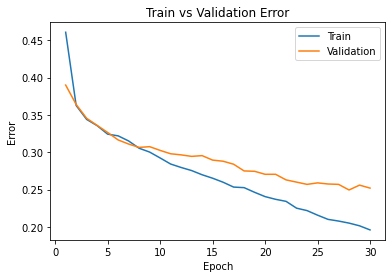

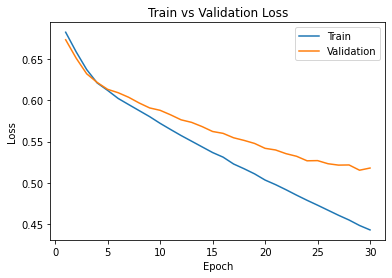

In [ ]:
simple_net = simpleANN()
train_net(simple_net, batch_size=128, learning_rate=0.001, num_epochs=30)
model_path8 = get_model_name("simple", batch_size=128, learning_rate=0.001, epoch=29)
plot_training_curve(model_path8)

In [ ]:
net = simpleANN()
model_path8 = get_model_name(net.name, batch_size=128, learning_rate=0.001, epoch=28)
state = torch.load(model_path8)
net.load_state_dict(state)

<All keys matched successfully>

In [ ]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=128)

evaluate(net, test_loader, nn.BCEWithLogitsLoss())

Files already downloaded and verified
Files already downloaded and verified


(0.2585, 0.5146955847740173)

The best CNN model is predicting better the test data points than the 3 layer ANN model, which contains no convolutional layers (0.129 vs 0.2585).

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html /content/LAB_1_ANN_and_PyTorch.ipynb

[NbConvertApp] Converting notebook /content/LAB_1_ANN_and_PyTorch.ipynb to html
[NbConvertApp] Writing 1024768 bytes to /content/LAB_1_ANN_and_PyTorch.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus